In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/netflix-shows/netflix_titles_nov_2019.csv


In [2]:
#irei fazer os imports que preciso aqui
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as hierarchy   #utilizaremos scipy para gerar o dendrograma

In [3]:
#Meu código inicia aqui

base_filmes = pd.read_csv(os.path.join(dirname, filename))#coletando a base
base_filmes.head()#vemos a base


,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [4]:
generos_filmes = base_filmes.listed_in.str.get_dummies(sep=',')#pegamos os dummies dos generos
generos_filmes.head() 

,Anime Features,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,Documentaries,Docuseries,Dramas,...,Sports Movies,Stand-Up Comedy,Stand-Up Comedy & Talk Shows,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Sci-Fi & Fantasy,TV Shows,Thrillers
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#agora devemos dar pesos maiores aos gêneros de filmes que aparecem menos felmos no conjunto total uma vez que isso pode ser um diferencial para classificar um filme
scaler = StandardScaler()#vamos utilizar um scaler comum para isso

generos_escalados = scaler.fit_transform(generos_filmes)#passamos os gêneros como os dados que serão escalados

generos_escalados#aqui temos os valores escalados

array([[-0.07307054, -0.05561758, -0.02928035, ..., -0.01309008,
        -0.04142643, -0.07987058],
       [-0.07307054, -0.05561758, -0.02928035, ..., -0.01309008,
        -0.04142643, -0.07987058],
       [-0.07307054, -0.05561758, -0.02928035, ..., -0.01309008,
        -0.04142643, -0.07987058],
       ...,
       [-0.07307054, -0.05561758, -0.02928035, ..., -0.01309008,
        -0.04142643, -0.07987058],
       [-0.07307054, -0.05561758, -0.02928035, ..., -0.01309008,
        -0.04142643, -0.07987058],
       [-0.07307054, -0.05561758, -0.02928035, ..., -0.01309008,
        -0.04142643, -0.07987058]])

In [6]:
#vamos descobrir quais são os possíveis melhores valores de k analisando o erro quadratico medio de alguns valores de k

def valor_kmeans(n_clusters, base):#geramos uma funcao que devolve o erro quadratico para um dado numero de clusters
    model = KMeans(n_clusters = n_clusters)
    model.fit(generos_escalados)
    return [n_clusters,model.inertia_]
    

valores_modelos = [valor_kmeans(n, generos_escalados) for n in range(1, 100)]#gero os valores de erros quadraticos para 1 a 99 clustes
erro_pelo_k = pd.DataFrame(valores_modelos,columns = ["K","Erro Quadratico"])#gero um dataframe com essa informacao



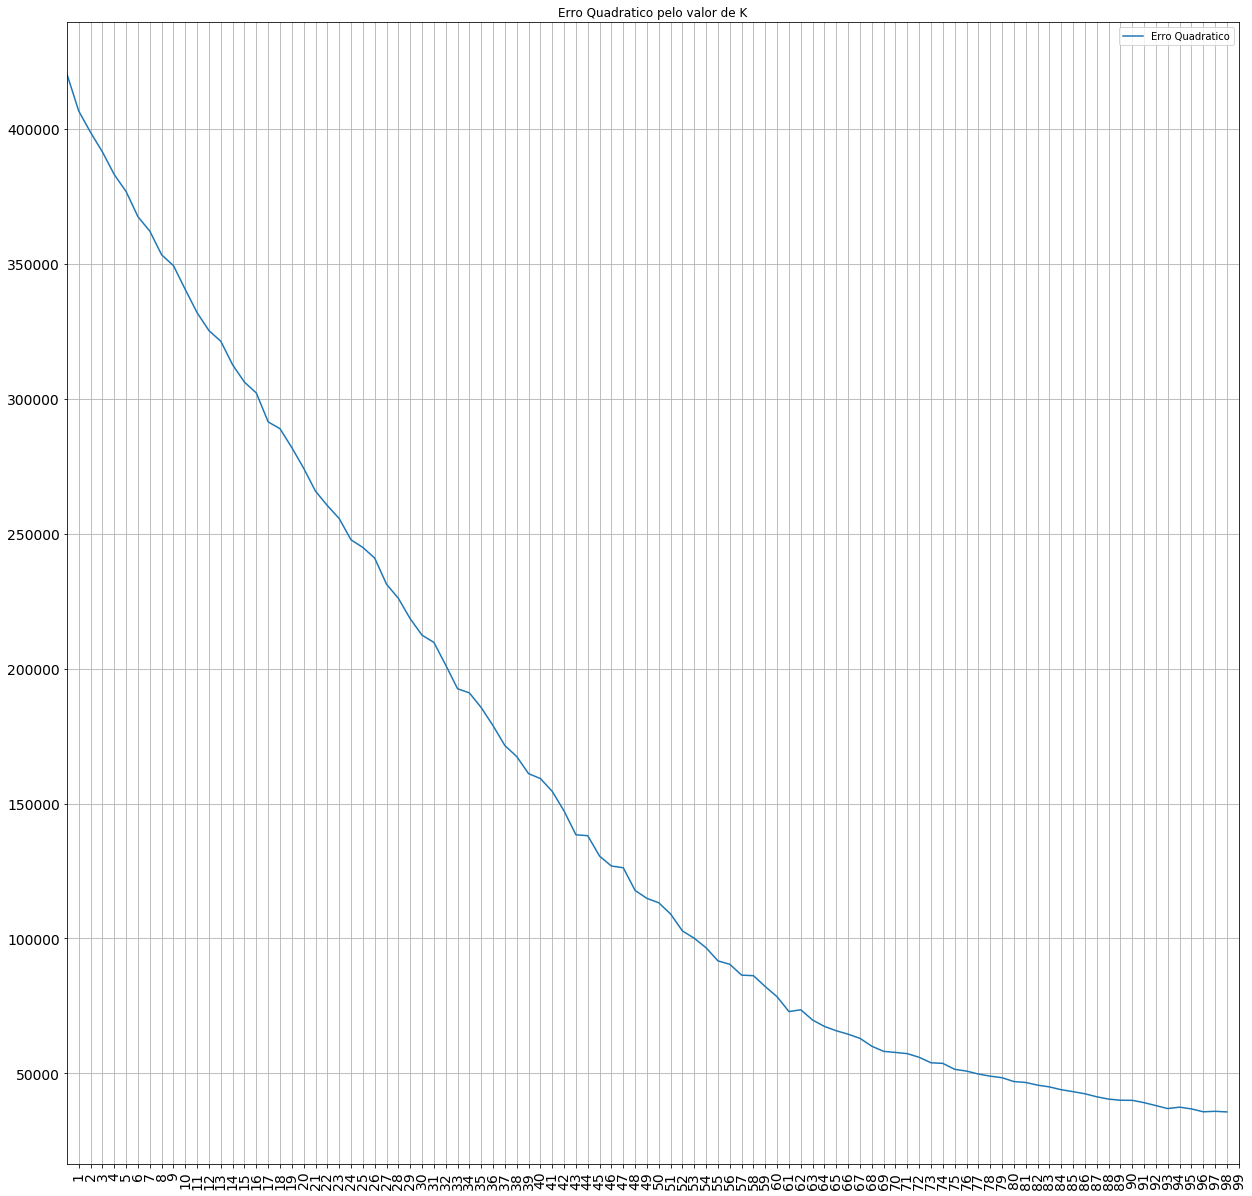

In [7]:
#vamos analisar graficamente o que obtemos

erro_pelo_k["Erro Quadratico"].plot(xticks = erro_pelo_k.K,figsize = (21,21),title = "Erro Quadratico pelo valor de K",rot = 90,grid = True, legend = True, fontsize = 14)

In [8]:
#pelo elbow method vemos no gráfico que os valores entre 64 e 69 podem ser bons valores para a clusterização
#vamos escolher 66 que esta no meio dos dois numeros e gerar um modelo

model = KMeans(n_clusters = 66)
model.fit(generos_escalados)

clusters = pd.DataFrame(model.cluster_centers_,#vamos criar um dataframe com os valores de cada centroide
            columns=generos_filmes.columns)

clusters.head()#observando o dataframe

,Anime Features,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,Documentaries,Docuseries,Dramas,...,Sports Movies,Stand-Up Comedy,Stand-Up Comedy & Talk Shows,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Sci-Fi & Fantasy,TV Shows,Thrillers
0,-0.073071,-0.055618,-0.02928,-0.054046,-0.216784,-0.095725,-0.076544,-0.064255,-0.149136,-0.303732,...,-0.01309,-0.218081,-0.069427,-0.069427,-0.122286,-0.096632,-0.037047,-0.01309,-0.041426,-0.079871
1,-0.073071,-0.055618,-0.02928,-0.054046,1.134450,-0.095725,-0.076544,-0.064255,-0.149136,1.100843,...,-0.01309,-0.218081,-0.069427,-0.069427,-0.122286,-0.096632,-0.037047,-0.01309,-0.041426,-0.079871
2,-0.073071,-0.055618,-0.02928,-0.054046,-0.216784,-0.095725,-0.076544,-0.064255,-0.149136,-0.303732,...,-0.01309,-0.218081,-0.069427,-0.069427,-0.122286,-0.096632,-0.037047,-0.01309,-0.041426,-0.079871
3,-0.073071,-0.055618,-0.02928,-0.054046,-0.216784,-0.095725,-0.076544,-0.064255,-0.149136,3.292379,...,-0.01309,-0.218081,-0.069427,-0.069427,-0.122286,-0.096632,-0.037047,-0.01309,-0.041426,-0.079871
4,-0.073071,-0.055618,-0.02928,-0.054046,-0.216784,-0.095725,-0.076544,-0.064255,-0.149136,0.350106,...,-0.01309,-0.218081,-0.069427,-0.069427,-0.122286,-0.096632,-0.037047,-0.01309,-0.041426,-0.079871


In [9]:
#vamos encontrar para cada centróide as dois principais gêneros de filmes que por consequência serão os dois principais gêneros do cluster também

categorias_clusters = []#list que conterá os gêneros de cada cluster

valores = clusters.values.copy()#coletamos o valores de cada cluster


for valor in valores:#para cluster linha em valores vamos encontra o nome dos dois gêneros mais representativas
    max_valor = max(valor)
    index_max  = valor.tolist().index(max_valor)
    valor[index_max] = -10000
    maior_valor_nome = clusters.columns[index_max]
    segundo_max_valor = max(valor)
    segundo_index_max  = valor.tolist().index(segundo_max_valor)
    valor[segundo_index_max] = -10000
    segundo_maior_valor_nome = clusters.columns[segundo_index_max]
    
    categorias_clusters += [[maior_valor_nome,segundo_maior_valor_nome]]
    
categorias_clusters_dataframe = pd.DataFrame(categorias_clusters,columns=["Genero 1", "Genero 2"])#colocamos esses generos em um dataframe  

categorias_clusters_dataframe#visualizamos o que obtemos


,Genero 1,Genero 2
0,Stand-Up Comedy & Talk Shows,International TV Shows
1,Action & Adventure,Comedies
2,Horror Movies,Thrillers
3,Dramas,Comedies
4,Children & Family Movies,Dramas
...,...,...
61,TV Thrillers,TV Dramas
62,Romantic Movies,Comedies
63,Comedies,Children & Family Movies
64,Music & Musicals,Sports Movies


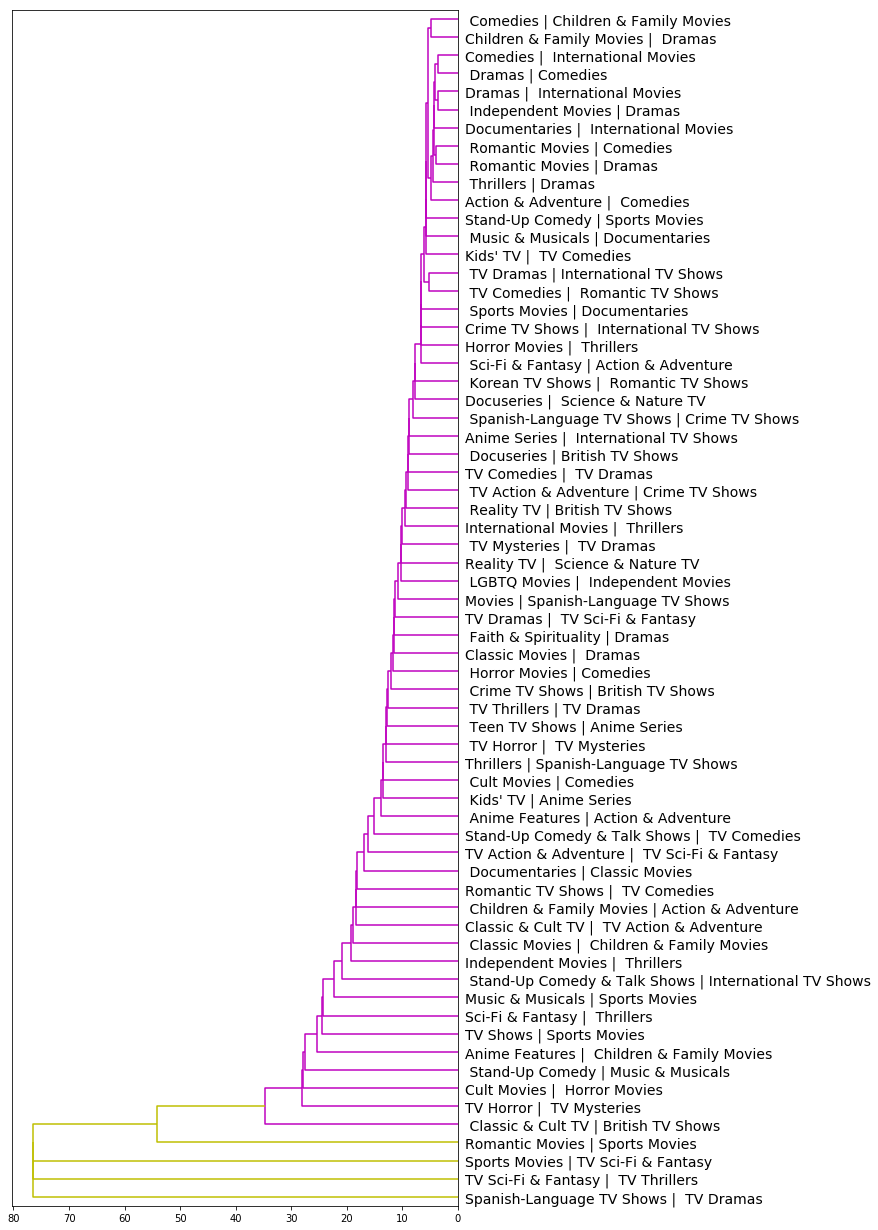

In [10]:
#Vamos agora plotar um dendograma que criará uma hierarquia entre esses cluster encontrados

#com uma hierarquia sabemos que quão mais próximos na hierarquia dois cluster estão maiores a chance de uma pessoa que gostou dos filmes de um deles gostar dos filmes do outro

#usamos scipy para plotar o dendograma
hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
plt.subplots(1, 1, figsize=(8, 22))
Z = hierarchy.linkage(clusters, 'single')
dn1 = hierarchy.dendrogram(Z, labels = ([(categorias[0] + " | " + categorias[1]) for categorias in categorias_clusters]) ,above_threshold_color='y',orientation='left',leaf_font_size = 14)
